In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

In [35]:
%matplotlib inline

In [36]:
lbl_enc = LabelEncoder()

In [37]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [38]:
data = pd.read_csv('Loan_Repayment.csv')

In [39]:
data.shape

(20000, 31)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
Loan ID                           20000 non-null int64
Amount Requested                  20000 non-null int64
Amount Funded By Investors        20000 non-null float64
Interest Rate                     20000 non-null object
Loan Length                       20000 non-null object
CREDIT Grade                      20000 non-null object
Loan Title                        19995 non-null object
Loan Purpose                      20000 non-null object
Monthly PAYMENT                   20000 non-null float64
Total Amount Funded               20000 non-null int64
DebtToIncomeRatio                 20000 non-null object
City                              20000 non-null object
State                             20000 non-null object
Home Ownership                    20000 non-null object
Monthly Income                    20000 non-null float64
FICO Range                        19986 non-null ob

In [41]:
data.isnull().sum()

Loan ID                               0
Amount Requested                      0
Amount Funded By Investors            0
Interest Rate                         0
Loan Length                           0
CREDIT Grade                          0
Loan Title                            5
Loan Purpose                          0
Monthly PAYMENT                       0
Total Amount Funded                   0
DebtToIncomeRatio                     0
City                                  0
State                                 0
Home Ownership                        0
Monthly Income                        0
FICO Range                           14
Earliest CREDIT Line                 22
Open CREDIT Lines                    22
Total CREDIT Lines                   22
Revolving CREDIT Balance             22
Revolving Line Utilization           62
Inquiries in the Last 6 Months       22
Accounts Now Delinquent              22
Delinquent Amount                    22
Delinquencies                        22


In [42]:
data.head()

Loan ID  Amount Requested  Amount Funded By Investors Interest Rate  \
0  2227104             12000                    12000.00        13.11%   
1  1690660              2000                     2000.00        17.27%   
2  2301695              9000                     9000.00         7.90%   
3   844352             13000                    13000.00        11.99%   
4   330773             10000                     1525.01        10.71%   

  Loan Length CREDIT Grade               Loan Title        Loan Purpose  \
0   36 months           B4  Credit card refinancing         credit_card   
1   36 months           C5            Car financing                 car   
2   36 months           A4              Bundle Loan  debt_consolidation   
3   36 months           B5                  Payback  debt_consolidation   
4   36 months           B5            Business Loan               other   

   Monthly PAYMENT  Total Amount Funded DebtToIncomeRatio             City  \
0           404.97                12000            15.24%        KINGSBURG   
1            71.58                 2000            12.07%  FORT LAUDERDALE   
2           281.62                 9000            20.01%   PEACHTREE CITY   
3           431.73                13000             7.59%      Minneapolis   
4           163.01                 5000            12.48%             reno   

  State Home Ownership  Monthly Income FICO Range Earliest CREDIT Line  \
0    CA       MORTGAGE         4166.67    690-694             11/25/89   
1    FL            OWN         2083.33    660-664              1/27/07   
2    GA       MORTGAGE         7750.00    690-694              2/26/97   
3    MN           RENT         5833.33    705-709              10/3/00   
4    NV       MORTGAGE        16666.67    700-704              3/21/88   

   Open CREDIT Lines  Total CREDIT Lines  Revolving CREDIT Balance  \
0               10.0                24.0                   20229.0   
1               18.0                28.0                    6175.0   
2                9.0                39.0                   11639.0   
3               12.0                26.0                    6696.0   
4               20.0                30.0                   53087.0   

  Revolving Line Utilization  Inquiries in the Last 6 Months  \
0                     86.80%                             0.0   
1                     36.80%                             3.0   
2                     46.60%                             0.0   
3                     47.50%                             1.0   
4                     69.90%                             1.0   

   Accounts Now Delinquent  Delinquent Amount  Delinquencies  \
0                      0.0                0.0            0.0   
1                      0.0                0.0            0.0   
2                      0.0                0.0            2.0   
3                      0.0                0.0            0.0   
4                      0.0                0.0            0.0   

   Months Since Last Delinquency  Public Records On File  \
0                           34.0                     0.0   
1                           30.0                     0.0   
2                           10.0                     0.0   
3                           58.0                     0.0   
4                           45.0                     0.0   

   Months Since Last Record Education Employment Length  Status  
0                       NaN       NaN           7 years       0  
1                       NaN       NaN            1 year       1  
2                       NaN       NaN          < 1 year       0  
3                       NaN       NaN           5 years       1  
4                       NaN       NaN          < 1 year       0

In [43]:
data.columns = data.columns.str.replace(' ','_')

# Data Understanding

## 1. Understanding distribution of Credit Grade values in the data file

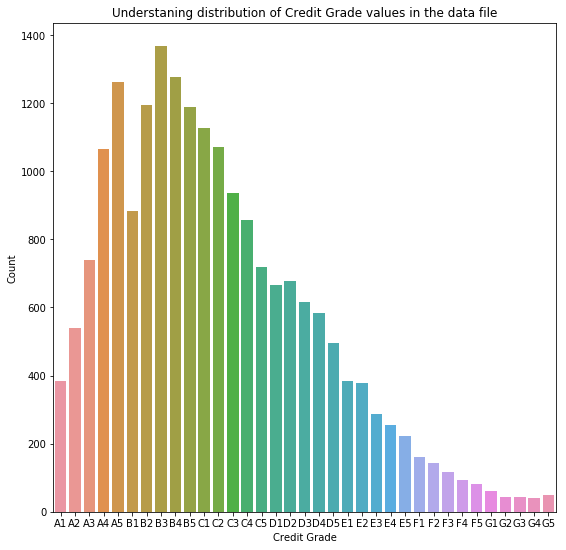

In [44]:
fig,axes = plt.subplots(1,1,figsize=(9,9))
order_list = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
axes = sns.countplot(x='CREDIT_Grade',data = data, order=order_list,ax=axes)
axes.set(xlabel='Credit Grade', ylabel='Count',title ='Understaning distribution of Credit Grade values in the data file')
plt.show()

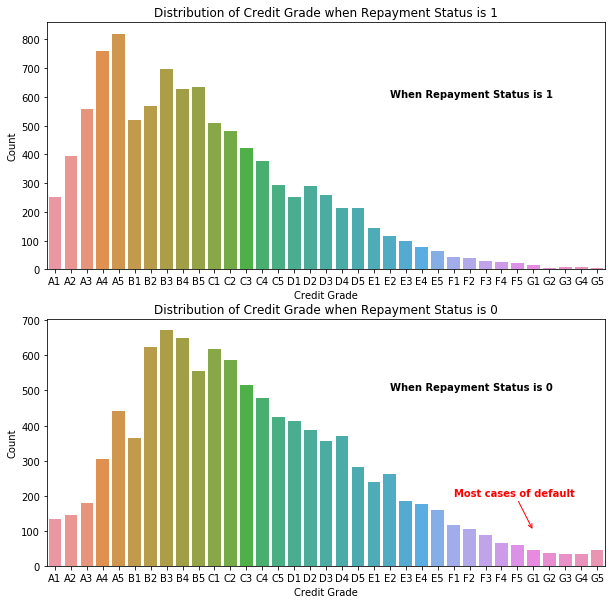

In [45]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
order_list = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
sns.countplot(x='CREDIT_Grade', data = data[data['Status'] == 1],ax=axes[0], order=order_list)
sns.countplot(x='CREDIT_Grade', data = data[data['Status'] == 0],ax=axes[1], order=order_list)
axes[0].set(xlabel='Credit Grade', ylabel='Count',title ='Distribution of Credit Grade when Repayment Status is 1')
axes[0].text(21, 600,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
axes[1].set(xlabel='Credit Grade', ylabel='Count',title ='Distribution of Credit Grade when Repayment Status is 0')
axes[1].text(21, 500,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
el = Ellipse((2, -1), 0.5, 0.5)
axes[1].add_patch(el)
plt.annotate(
'Most cases of default', xy=(30, 100), xycoords='data',
            xytext=(25, 200), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',color='red'),fontsize=10, fontweight = 'bold', color='red'
)
plt.show()

## 2. Understanding distribution of Loan Term values in the data file

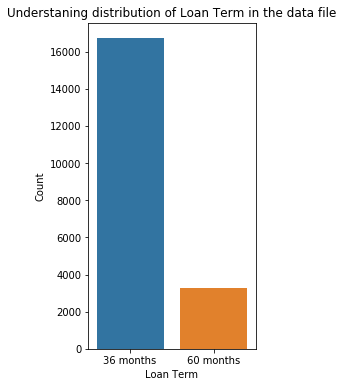

In [46]:
fig,axes = plt.subplots(1,1,figsize=(3,6))
axes = sns.countplot(x='Loan_Length',data = data,ax=axes)
axes.set(xlabel='Loan Term', ylabel='Count',title ='Understaning distribution of Loan Term in the data file')
plt.show()

## 3. Understanding distribution of Loan Purpose values in the data file

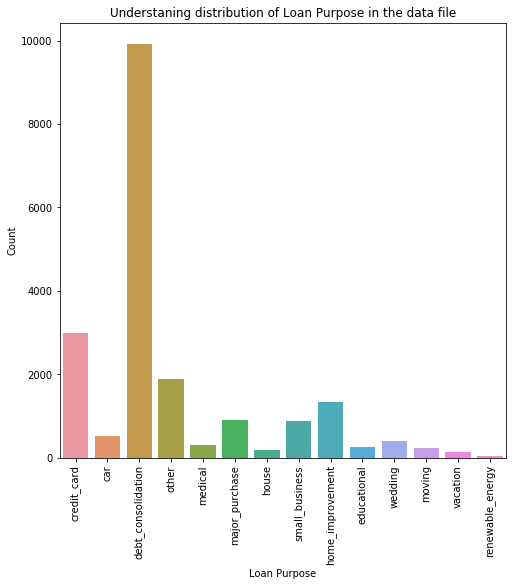

In [47]:
fig,axes = plt.subplots(1,1,figsize=(8,8))
g = sns.countplot(x='Loan_Purpose',data = data,ax=axes)
g.set(xlabel='Loan Purpose', ylabel='Count',title ='Understaning distribution of Loan Purpose in the data file')
plt.xticks(rotation=90)
plt.show()

## 4. Understanding distribution of Loan Application from Each US States

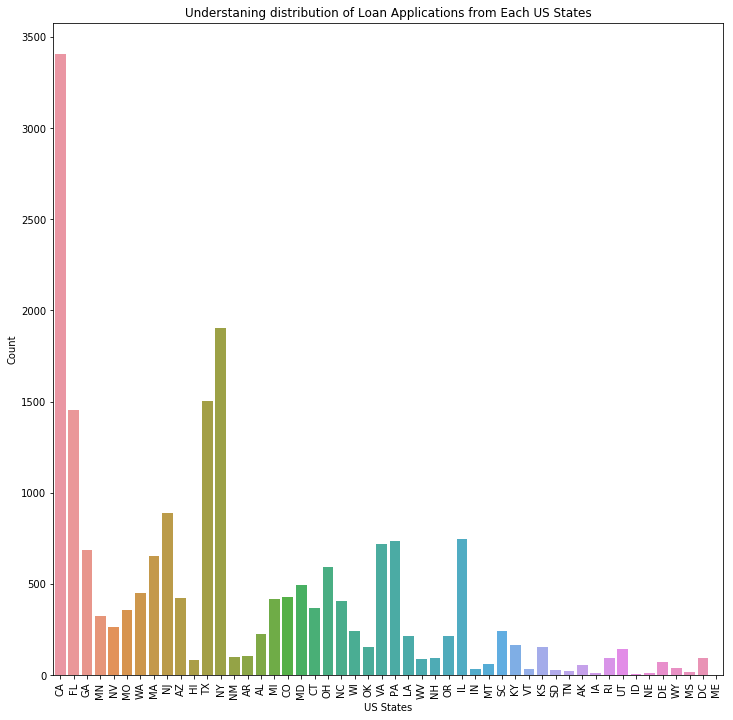

In [48]:
fig,axes = plt.subplots(1,1,figsize=(12,12))
g = sns.countplot(x='State',data = data,ax=axes)
g.set(xlabel='US States', ylabel='Count',title ='Understaning distribution of Loan Applications from Each US States')
plt.xticks(rotation=90)
plt.show()

## 5. Understanding distribution of FICO Range

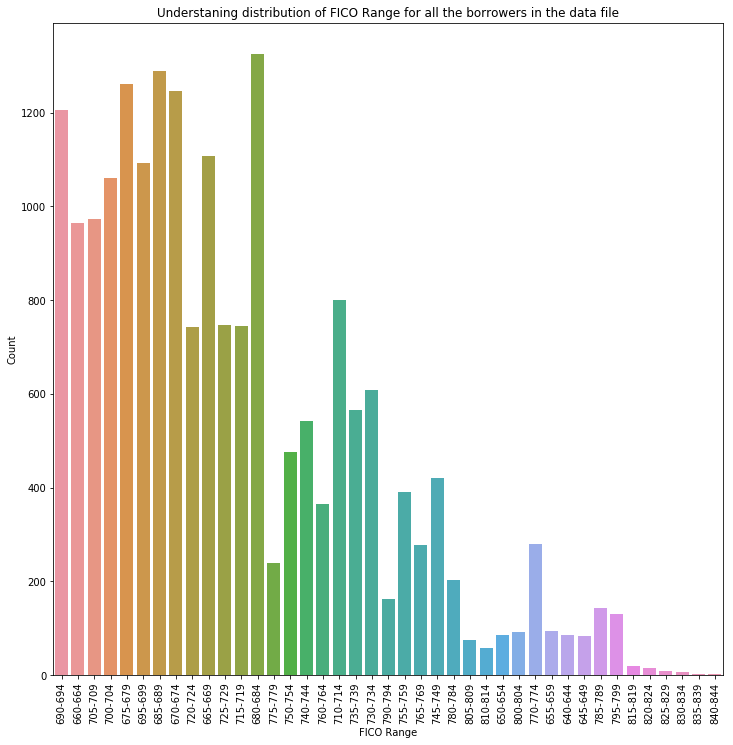

In [49]:
fig,axes = plt.subplots(1,1,figsize=(12,12))
g = sns.countplot(x='FICO_Range',data = data,ax=axes)
g.set(xlabel='FICO Range', ylabel='Count',title ='Understaning distribution of FICO Range for all the borrowers in the data file')
plt.xticks(rotation=90)
plt.show()

## 6. Understanding distribution of Borrowers Employment Tenure

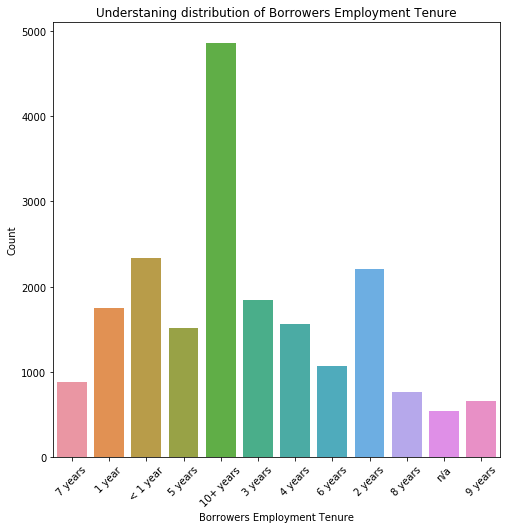

In [50]:
fig,axes = plt.subplots(1,1,figsize=(8,8))
g = sns.countplot(x='Employment_Length',data = data,ax=axes)
g.set(xlabel='Borrowers Employment Tenure', ylabel='Count',title ='Understaning distribution of Borrowers Employment Tenure')
plt.xticks(rotation=45)
plt.show()

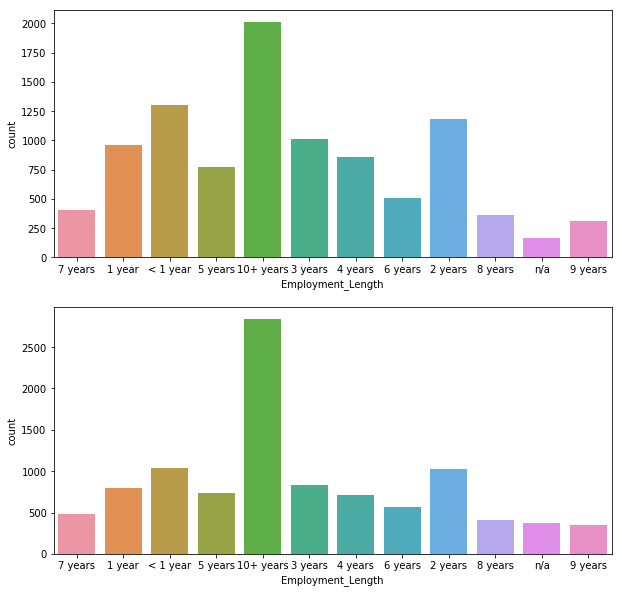

In [51]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
order_list = ['7 years','1 year','< 1 year','5 years','10+ years','3 years','4 years','6 years','2 years','8 years','n/a','9 years']
sns.countplot(x='Employment_Length', data = data[data['Status'] == 1],ax=axes[0],order=order_list)
sns.countplot(x='Employment_Length', data = data[data['Status'] == 0],ax=axes[1],order=order_list)


## 7. Understaning distribution of Monthly Income

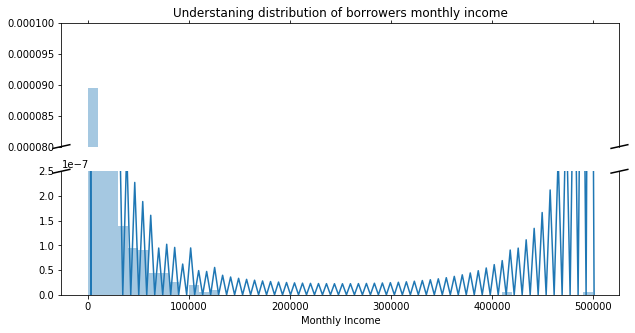

In [52]:
fig,axes = plt.subplots(2,1,figsize=(10,5))
g1 = sns.distplot(data['Monthly_Income'],kde=True,ax=axes[0])
g2 = sns.distplot(data['Monthly_Income'],kde=True,ax=axes[1])
g1.set_ylim(0.00008,0.0001)
g2.set_ylim(0,0.00000025)

g1.spines['bottom'].set_visible(False)
g2.spines['top'].set_visible(False)
g1.xaxis.tick_top()
g1.tick_params(labeltop='off')  # don't put tick labels at the top
g2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=g1.transAxes, color='k', clip_on=False)
g1.plot((-d, +d), (-d, +d), **kwargs) 
g1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=g2.transAxes)
g2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
g2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

g1.set(xlabel='',title ='Understaning distribution of borrowers monthly income')
g2.set(xlabel='Monthly Income')
#g1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))

plt.show()

## 8. Understaning distribution of Amount Requested by the borrower

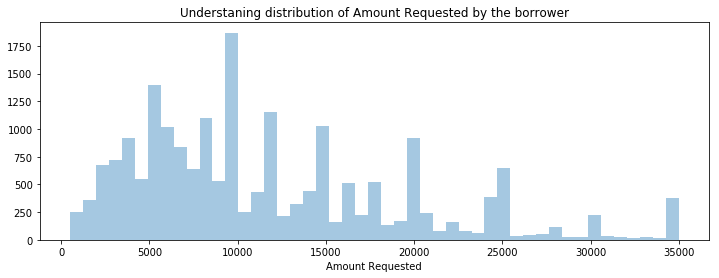

In [53]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
g1 = sns.distplot(data['Amount_Requested'],ax=axes,kde=False)
g1.set(xlabel='Amount Requested',title ='Understaning distribution of Amount Requested by the borrower')
plt.show()

# Data Preparation | Data Cleaning

## 1. Renaming Columns - Removing whitespace from columns

In [54]:
data.columns

Index(['Loan_ID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'CREDIT_Grade', 'Loan_Title',
       'Loan_Purpose', 'Monthly_PAYMENT', 'Total_Amount_Funded',
       'DebtToIncomeRatio', 'City', 'State', 'Home_Ownership',
       'Monthly_Income', 'FICO_Range', 'Earliest_CREDIT_Line',
       'Open_CREDIT_Lines', 'Total_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Revolving_Line_Utilization', 'Inquiries_in_the_Last_6_Months',
       'Accounts_Now_Delinquent', 'Delinquent_Amount', 'Delinquencies',
       'Months_Since_Last_Delinquency', 'Public_Records_On_File',
       'Months_Since_Last_Record', 'Education', 'Employment_Length', 'Status'],
      dtype='object')

In [55]:
data.columns = data.columns.str.replace(' ','_')

In [56]:
data.columns

Index(['Loan_ID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'CREDIT_Grade', 'Loan_Title',
       'Loan_Purpose', 'Monthly_PAYMENT', 'Total_Amount_Funded',
       'DebtToIncomeRatio', 'City', 'State', 'Home_Ownership',
       'Monthly_Income', 'FICO_Range', 'Earliest_CREDIT_Line',
       'Open_CREDIT_Lines', 'Total_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Revolving_Line_Utilization', 'Inquiries_in_the_Last_6_Months',
       'Accounts_Now_Delinquent', 'Delinquent_Amount', 'Delinquencies',
       'Months_Since_Last_Delinquency', 'Public_Records_On_File',
       'Months_Since_Last_Record', 'Education', 'Employment_Length', 'Status'],
      dtype='object')

## 2. Removing percent symbol (%) from data values in column Interest_Rate

In [57]:
data['Interest_Rate'].head(5)

0    13.11%
1    17.27%
2     7.90%
3    11.99%
4    10.71%
Name: Interest_Rate, dtype: object

In [58]:
data['Interest_Rate'] = data['Interest_Rate'].str.replace('%','')

In [95]:
data['Interest_Rate'].head(5)

2     7.90
3    11.99
4    10.71
5    17.77
6    15.31
Name: Interest_Rate, dtype: object

## 3. Removing text from Loan_Length columns

In [60]:
data['Loan_Length'].value_counts()

36 months    16725
60 months     3275
Name: Loan_Length, dtype: int64

In [61]:
data.loc[data['Loan_Length'] == '36 months','Loan_Length'] = 36
data.loc[data['Loan_Length'] == '60 months','Loan_Length'] = 60

In [62]:
data['Loan_Length'].value_counts()

36    16725
60     3275
Name: Loan_Length, dtype: int64

## 4. Transforming categorical text in column CREDIT_Grade into a numeric value

In [63]:
data['CREDIT_Grade'].value_counts().head(5)

B3    1368
B4    1276
A5    1261
B2    1195
B5    1189
Name: CREDIT_Grade, dtype: int64

In [64]:
data['CREDIT_Grade_Code'] = lbl_enc.fit_transform(data['CREDIT_Grade'])

In [65]:
data['CREDIT_Grade_Code'].value_counts().head(5)

7    1368
8    1276
4    1261
6    1195
9    1189
Name: CREDIT_Grade_Code, dtype: int64

## 5. Transforming categorical text in column Loan_Purpose into a numeric value

In [66]:
data['Loan_Purpose'].value_counts().head(5)

debt_consolidation    9926
credit_card           2985
other                 1881
home_improvement      1332
major_purchase         912
Name: Loan_Purpose, dtype: int64

In [67]:
data['Loan_Purpose'] = lbl_enc.fit_transform(data['Loan_Purpose'])

In [68]:
data['Loan_Purpose'].value_counts().head(5)

2    9926
1    2985
9    1881
4    1332
6     912
Name: Loan_Purpose, dtype: int64

## 6. Removing percent symbol (%) from data values in column DebtToIncomeRatio

In [69]:
data['DebtToIncomeRatio'].head(5)

0    15.24%
1    12.07%
2    20.01%
3     7.59%
4    12.48%
Name: DebtToIncomeRatio, dtype: object

In [70]:
data['DebtToIncomeRatio'] = data['DebtToIncomeRatio'].str.replace('%','')

In [71]:
data['DebtToIncomeRatio'].head(5)

0    15.24
1    12.07
2    20.01
3     7.59
4    12.48
Name: DebtToIncomeRatio, dtype: object

## 7. Transforming categorical text in column City into a numeric value

In [72]:
data['City'].value_counts().head(5)

New York         165
Chicago          142
Los Angeles      119
Brooklyn         115
San Francisco    101
Name: City, dtype: int64

In [73]:
data['City'] = lbl_enc.fit_transform(data['City'])

In [74]:
data['City'].value_counts().head(5)

3874    165
1076    142
3168    119
664     115
5138    101
Name: City, dtype: int64

## 8. Transforming categorical text in column State into a numeric value

In [75]:
data['State'].value_counts().head(5)

CA    3408
NY    1904
TX    1502
FL    1452
NJ     887
Name: State, dtype: int64

In [76]:
data['State'] = lbl_enc.fit_transform(data['State'])

In [77]:
data['State'].value_counts().head(5)

4     3408
33    1904
42    1502
9     1452
30     887
Name: State, dtype: int64

## 9. Transforming categorical text in column Home Ownership into a numeric value

In [78]:
data['Home_Ownership'].value_counts().head(5)

RENT        9133
MORTGAGE    9084
OWN         1634
OTHER        113
NONE          36
Name: Home_Ownership, dtype: int64

In [79]:
data['Home_Ownership'] = lbl_enc.fit_transform(data['Home_Ownership'])

In [80]:
data['Home_Ownership'].value_counts().head(5)

4    9133
0    9084
3    1634
2     113
1      36
Name: Home_Ownership, dtype: int64

## 10. Tranforming range values into a numerical value

In [81]:
data['FICO_Range'].head(5)

0    690-694
1    660-664
2    690-694
3    705-709
4    700-704
Name: FICO_Range, dtype: object

In [82]:
def comp_avg(row):
    if isinstance(row,str):
        t = row.split('-')
        return (int(t[0]) + int(t[1]))/2
    else:
        return 0

In [83]:
data['FICO_Range'] = data['FICO_Range'].apply(comp_avg)

In [84]:
data['FICO_Range'].head(5)

0    692.0
1    662.0
2    692.0
3    707.0
4    702.0
Name: FICO_Range, dtype: float64

## 11. Deleting rows which doesn't have FICO_Range

In [85]:
data.drop(data['FICO_Range'] == 0, inplace=True)

## 12. Converting values in Earliest_CREDIT_Line column to date data type

In [86]:
data['Earliest_CREDIT_Line'] = pd.to_datetime(data['Earliest_CREDIT_Line'])

## 13. Removing percent symbol (%) from data values in column Revolving_Line_Utilization

In [87]:
data['Revolving_Line_Utilization'].head(5)

2    46.60%
3    47.50%
4    69.90%
5    57.30%
6    70.30%
Name: Revolving_Line_Utilization, dtype: object

In [88]:
data['Revolving_Line_Utilization'] = data['Revolving_Line_Utilization'].str.replace('%','')

In [89]:
data['Revolving_Line_Utilization'].head(5)

2    46.60
3    47.50
4    69.90
5    57.30
6    70.30
Name: Revolving_Line_Utilization, dtype: object

## 14. Transforming categorical text in column Employment_Length into a numeric value

In [90]:
data['Employment_Length'].value_counts()

10+ years    4857
< 1 year     2342
2 years      2210
3 years      1841
1 year       1753
4 years      1562
5 years      1513
6 years      1070
7 years       883
8 years       769
9 years       661
n/a           537
Name: Employment_Length, dtype: int64

In [91]:
data['Employment_Length'] = lbl_enc.fit_transform(data['Employment_Length'])

In [92]:
data['Employment_Length'].value_counts()

1     4857
10    2342
2     2210
3     1841
0     1753
4     1562
5     1513
6     1070
7      883
8      769
9      661
11     537
Name: Employment_Length, dtype: int64

## 15. Converting Object datatype columns to float datatype

In [96]:
data['Interest_Rate'] = data['Interest_Rate'].astype(float)
data['Loan_Length'] = data['Loan_Length'].astype(float)
data['DebtToIncomeRatio'] = data['DebtToIncomeRatio'].astype(float)
data['Revolving_Line_Utilization'] = data['Revolving_Line_Utilization'].astype(float)

## 16. Correlation Matrix

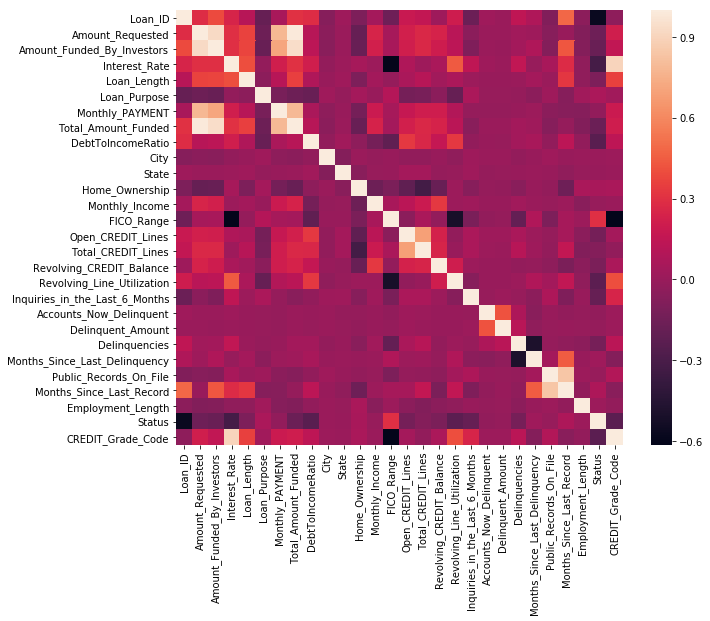

In [97]:
corr = data.corr()
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)

## 17. Understanding correlation between Credit Grade Code and Interest Rate

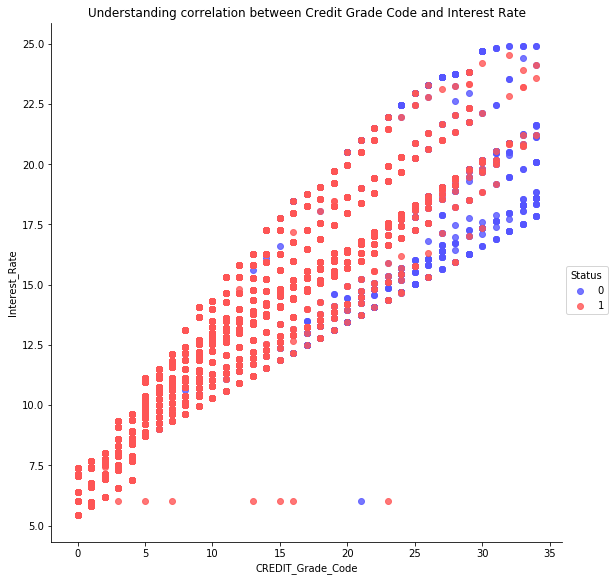

In [99]:
sns.lmplot(x='CREDIT_Grade_Code',y='Interest_Rate',data=data,palette='seismic',size=8,hue='Status',fit_reg=False)
plt.title('Understanding correlation between Credit Grade Code and Interest Rate')
plt.show()

In [100]:
data_0 = data[data['Status'] == 0]
data_1 = data[data['Status'] == 1]

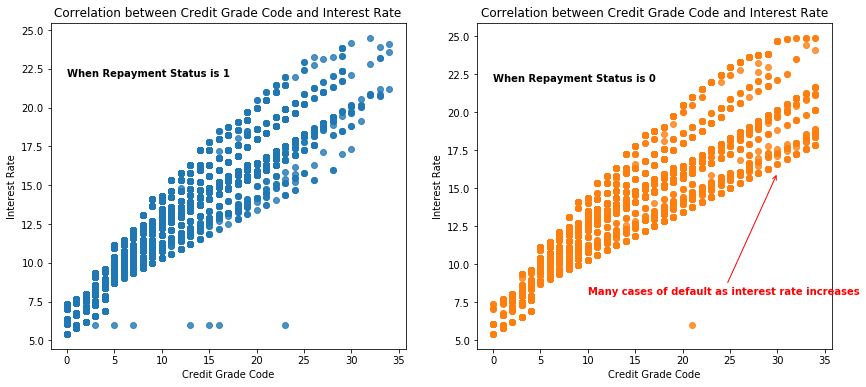

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
sns.regplot(x='CREDIT_Grade_Code',y='Interest_Rate',data=data_1,fit_reg=False,ax = ax[0])
sns.regplot(x='CREDIT_Grade_Code',y='Interest_Rate',data=data_0,fit_reg=False,ax = ax[1])
ax[0].set(xlabel='Credit Grade Code', ylabel='Interest Rate',title ='Correlation between Credit Grade Code and Interest Rate')
ax[0].text(0, 22,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
ax[1].set(xlabel='Credit Grade Code', ylabel='Interest Rate',title ='Correlation between Credit Grade Code and Interest Rate')
ax[1].text(0, 22,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
el = Ellipse((2, -1), 0.5, 0.5)
ax[1].add_patch(el)
plt.annotate(
'Many cases of default as interest rate increases', xy=(30, 16), xycoords='data',
            xytext=(10, 8), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',color='red'),fontsize=10, fontweight = 'bold', color='red'
)
plt.show()

## 18. Understanding correlation between Amount Requested and Amount Funded by the Investor

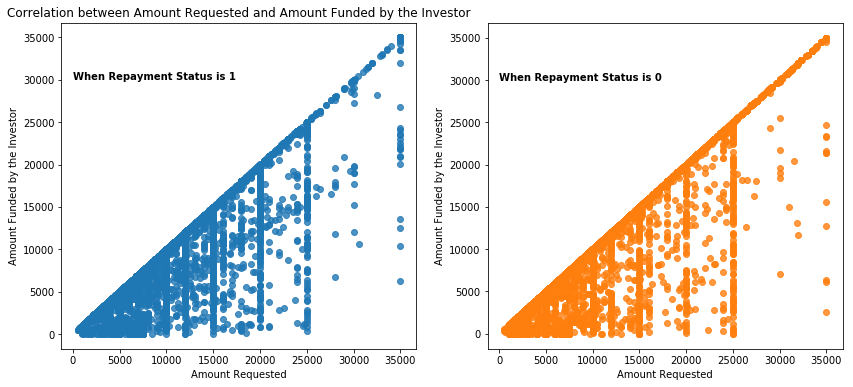

In [105]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.regplot(x='Amount_Requested',y='Amount_Funded_By_Investors',data=data_1,fit_reg=False,ax = ax[0])
sns.regplot(x='Amount_Requested',y='Amount_Funded_By_Investors',data=data_0,fit_reg=False,ax = ax[1])
ax[0].set(xlabel='Amount Requested', ylabel='Amount Funded by the Investor',title ='Correlation between Amount Requested and Amount Funded by the Investor')
ax[0].text(21, 30000,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
ax[1].set(xlabel='Amount Requested', ylabel='Amount Funded by the Investor')
ax[1].text(21, 30000,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.regplot(x='Amount_Requested',y='Amount_Funded_By_Investors',data=data_1,fit_reg=False,ax = ax[0])
sns.regplot(x='Amount_Requested',y='Amount_Funded_By_Investors',data=data_0,fit_reg=False,ax = ax[1])
ax[0].set(xlabel='Amount Requested', ylabel='Amount Funded by the Investor',title ='Correlation between Amount Requested and Amount Funded by the Investor')
ax[0].text(21, 30000,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
ax[1].set(xlabel='Amount Requested', ylabel='Amount Funded by the Investor')
ax[1].text(21, 30000,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
plt.show()

## 19. Understanding correlation between Total Amount Funded and Monthly Payment

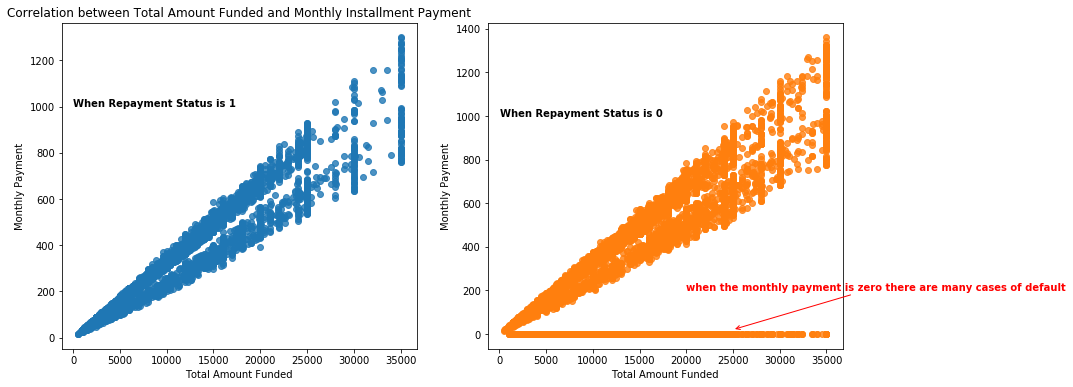

In [107]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.regplot(x='Total_Amount_Funded',y='Monthly_PAYMENT',data=data_1,fit_reg=False,ax = ax[0])
sns.regplot(x='Total_Amount_Funded',y='Monthly_PAYMENT',data=data_0,fit_reg=False,ax = ax[1])
ax[0].set(xlabel='Total Amount Funded', ylabel='Monthly Payment',title ='Correlation between Total Amount Funded and Monthly Installment Payment')
ax[0].text(21, 1000,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
ax[1].set(xlabel='Total Amount Funded', ylabel='Monthly Payment')
ax[1].text(21, 1000,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
el = Ellipse((2, -1), 0.5, 0.5)
ax[1].add_patch(el)
plt.annotate(
'when the monthly payment is zero there are many cases of default', xy=(25000, 20), xycoords='data',
            xytext=(20000, 200), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',color='red'),fontsize=10, fontweight = 'bold', color='red'
)
plt.show()

## 20. Understanding relationship between Revolving Credit Utilization and FICO Range

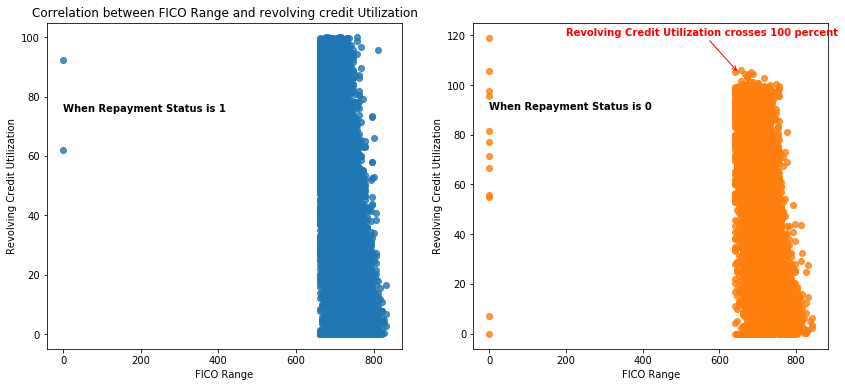

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
sns.regplot(x='FICO_Range',y='Revolving_Line_Utilization',data=data_1,fit_reg=False,ax = ax[0])
sns.regplot(x='FICO_Range',y='Revolving_Line_Utilization',data=data_0,fit_reg=False,ax = ax[1])
ax[0].set(xlabel='FICO Range', ylabel='Revolving Credit Utilization',title ='Correlation between FICO Range and revolving credit Utilization')
ax[0].text(0, 75,'When Repayment Status is 1', fontsize=10, fontweight = 'bold')
ax[1].set(xlabel='FICO Range', ylabel='Revolving Credit Utilization')
ax[1].text(0, 90,'When Repayment Status is 0', fontsize=10, fontweight = 'bold')
el = Ellipse((2, -1), 0.5, 0.5)
ax[1].add_patch(el)
plt.annotate(
'Revolving Credit Utilization crosses 100 percent', xy=(650, 105), xycoords='data',
            xytext=(200, 120), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',color='red'),fontsize=10, fontweight = 'bold', color='red'
)
plt.show()

## 21. Droping null values

In [94]:
data.isnull().sum()

Loan_ID                               0
Amount_Requested                      0
Amount_Funded_By_Investors            0
Interest_Rate                         0
Loan_Length                           0
CREDIT_Grade                          0
Loan_Title                            5
Loan_Purpose                          0
Monthly_PAYMENT                       0
Total_Amount_Funded                   0
DebtToIncomeRatio                     0
City                                  0
State                                 0
Home_Ownership                        0
Monthly_Income                        0
FICO_Range                            0
Earliest_CREDIT_Line                 22
Open_CREDIT_Lines                    22
Total_CREDIT_Lines                   22
Revolving_CREDIT_Balance             22
Revolving_Line_Utilization           62
Inquiries_in_the_Last_6_Months       22
Accounts_Now_Delinquent              22
Delinquent_Amount                    22
Delinquencies                        22


In [111]:
data.shape

(19998, 32)

In [112]:
data = data.drop(['Months_Since_Last_Record','Months_Since_Last_Delinquency','Education'],axis=1)

In [113]:
data.dropna(how='any',inplace=True)

In [114]:
data.shape

(19931, 29)

# Data Modeling

In [115]:
X = data.drop(['Loan_ID','CREDIT_Grade','Loan_Title','Earliest_CREDIT_Line','Status'],axis=1)
y = data['Status']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
dt = DecisionTreeClassifier(min_samples_split=100)

In [118]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
y_pred = dt.predict(X_test)

In [120]:
print(roc_auc_score(y_test,y_pred))

0.799741971483


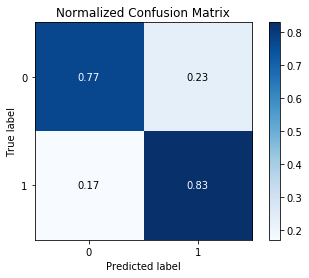

In [121]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)
plt.show()

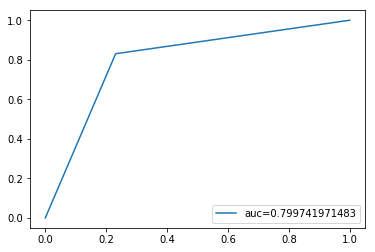

In [122]:
fpr, tpr, _ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

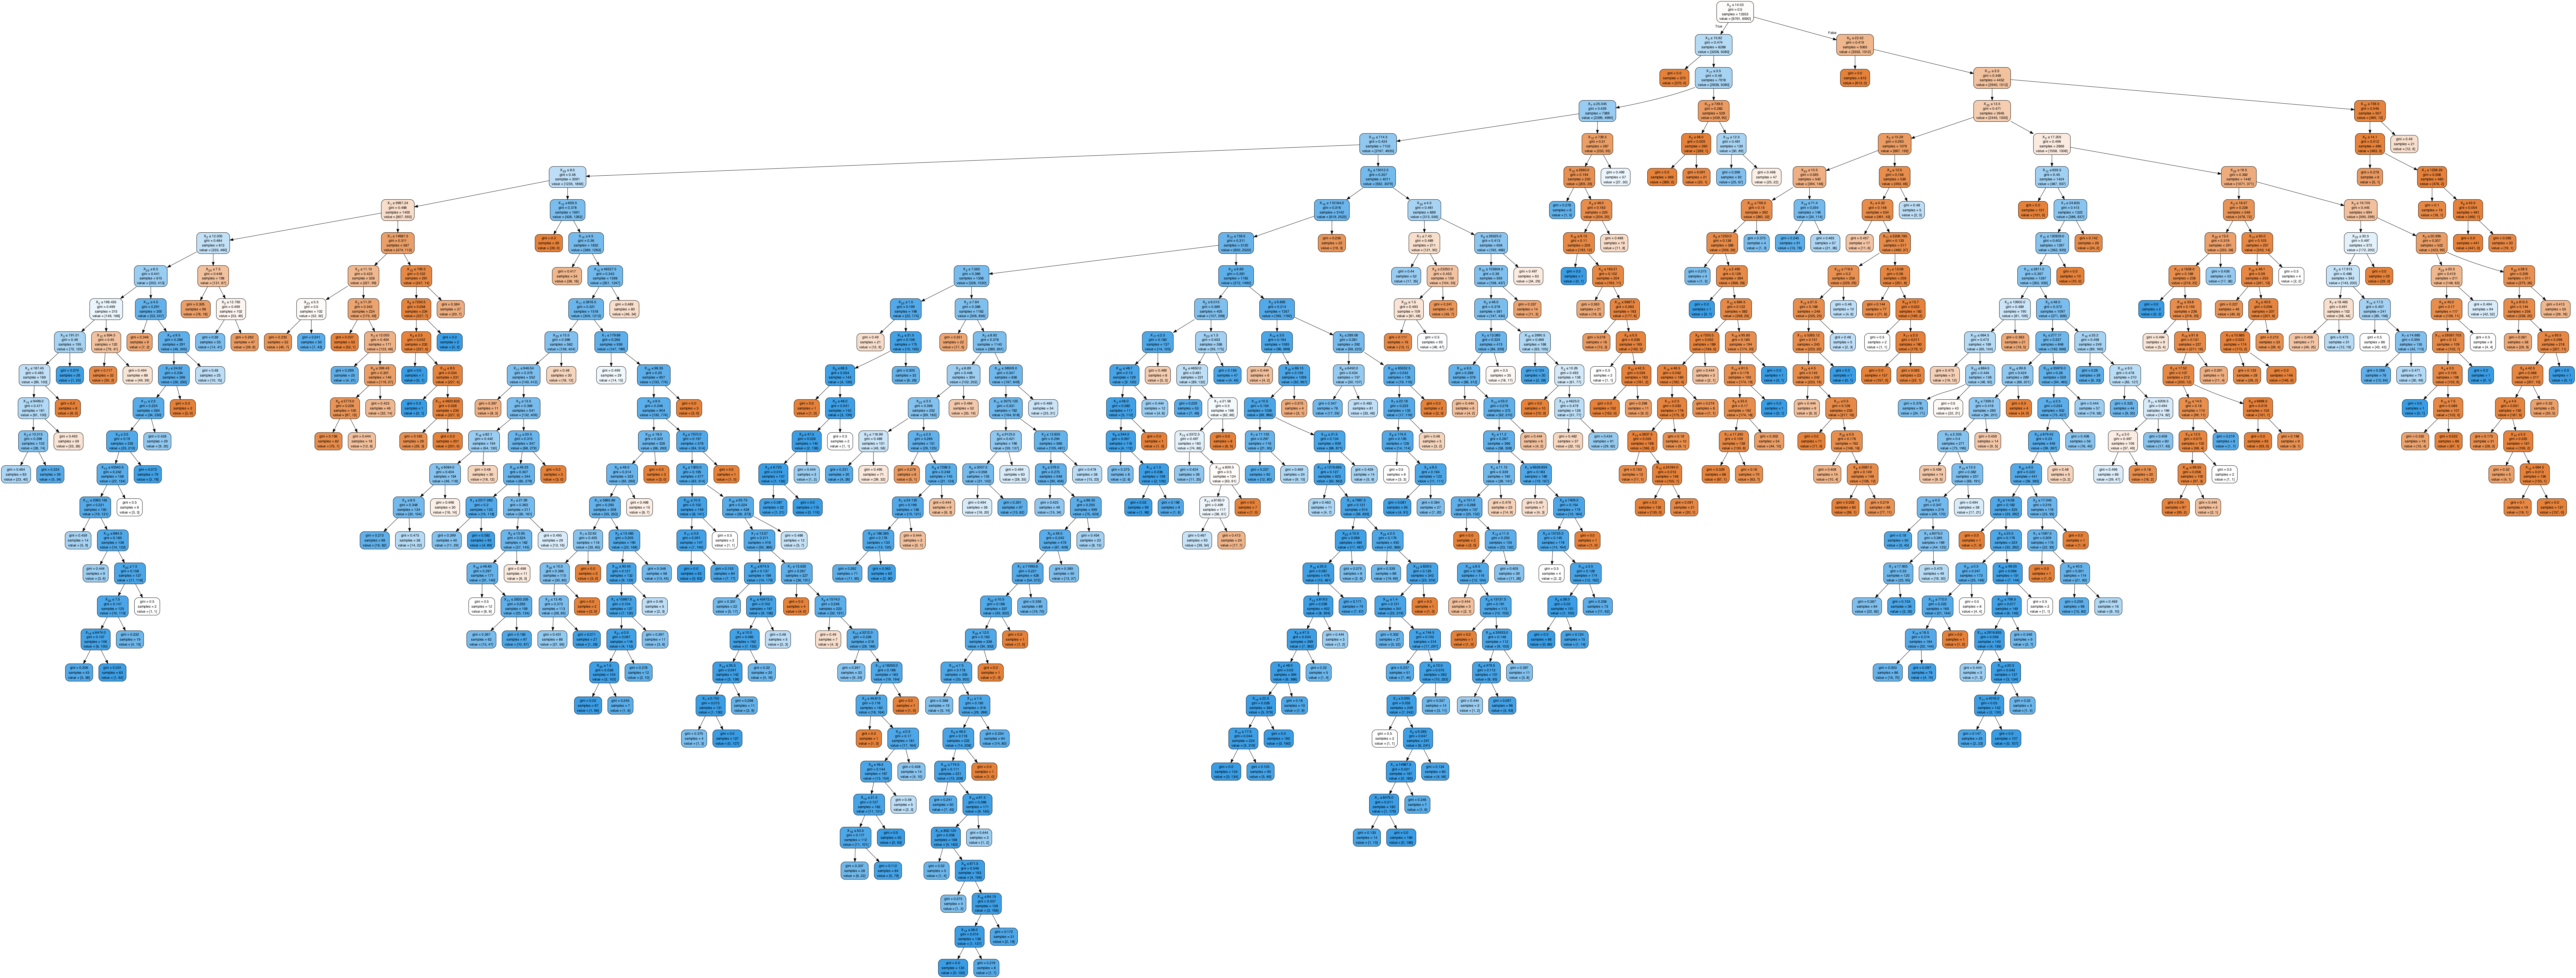

In [123]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())